In [18]:
import thztools as thz
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import time

In [19]:
N, m,dt = 300, 20, 0.05

#Create x-axis
t = thz.timebase(N, dt = dt)
#Generate simulated Thz wave
x = thz.wave(N, dt = dt)

In [20]:
#Initial parameters
a, b= 1.5, 1.4
print("Initial parameters:", "a = ", a, " b = ", b)

Initial parameters: a =  1.5  b =  1.4


In [21]:
def transfer_model(_w):
    return a * np.exp(-1j * b * _w)

def transfer_fit(p0, _w):
    return p0[0] * np.exp(-1j * p0[1] * _w)

model = thz.transfer(transfer_model, x, dt = dt)

In [34]:
#Initial estimates p0
initial_guess = [1.4, 0.9]

In [35]:
print("Initial guess:", "a = ", initial_guess[0], " b = ", initial_guess[1])
fit = thz.fit(transfer_fit, x, model, initial_guess, dt = dt)
print("Final guess:", "a = ", fit.p_opt[0], " b = ", fit.p_opt[1])

Initial guess: a =  1.4  b =  0.9
Final guess: a =  -3.571037248138966  b =  0.7012895491666009


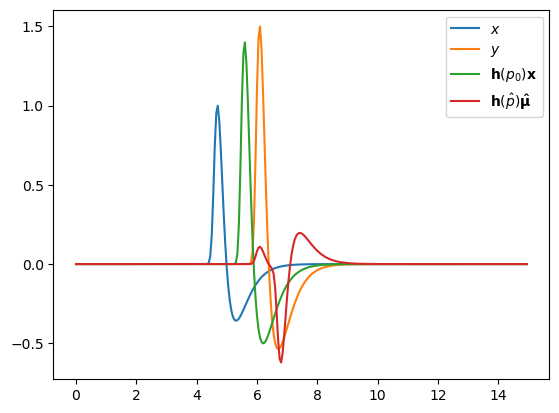

In [38]:
plt.plot(t, x, label=r"$x$")
plt.plot(t, model, label=r"$y$")
plt.plot(t, thz.transfer(lambda _w: transfer_fit(initial_guess, _w), x, dt=dt), 
         label=r"$\mathbf{h}(p_0)\mathbf{x}$")
# plt.plot(t, thz.transfer(transfer_model, fit.mu_opt, dt=dt), label=r"$\mathbf{h}(\hat{p})\boldsymbol{\mu}$")
plt.plot(t, thz.transfer(transfer_model, fit.mu_opt, dt=dt), label=r"$\mathbf{h}(\hat{p})\mathbf{\hat{\mu}}$")
plt.legend()
plt.show()

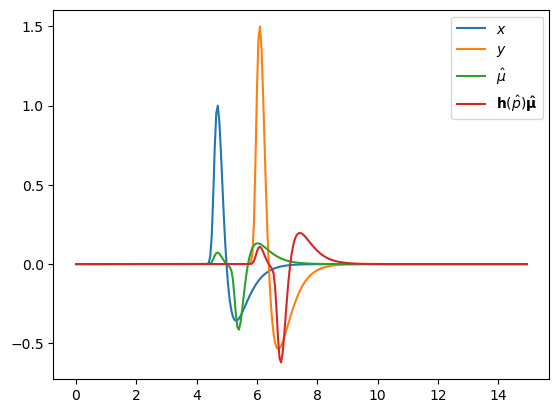

In [37]:
plt.plot(t, x, label=r"$x$")
plt.plot(t, model, label=r"$y$")
plt.plot(t, fit.mu_opt, label = r"$\hat{\mu}$")
plt.plot(t, thz.transfer(transfer_model, fit.mu_opt, dt=dt), 
         label=r"$\mathbf{h}(\hat{p})\mathbf{\hat{\mu}}$")
plt.legend()
plt.show()